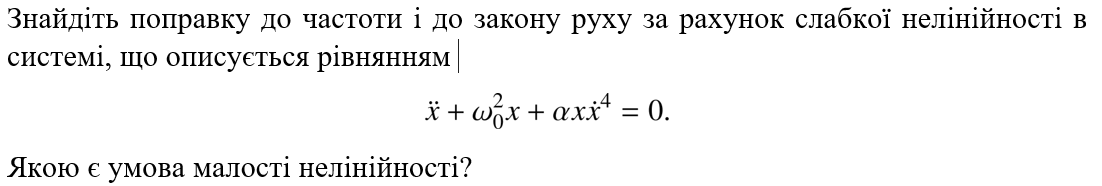

In [40]:
from IPython.display import display, Math, Latex

def disp(ex):
    display(Math(latex(ex)))

def displ(tex):
    display(Math(tex))

In [41]:
# Объявление переменных и функций

t = var("t")

X = var("x")
x = function("x")(t)

x1 = function("x_1")(t)
assume(x1 < x)

x2 = function("x_2")(t)
assume(x2 < x)

omega_0 = var("omega_0")
assume(omega_0, "real")
assume(omega_0>0)


omega_1 = var("omega_1")
assume(omega_1, "real")
assume(omega_1>0)


alpha = var("alpha")
assume(alpha, "real")
assume(alpha > 0)

A, phi = var("A, phi")

assume(alpha*A^2 < 1)

In [42]:
# линейная часть исходного дифференциального уравнения
eq0 = x.diff(t, 2) + omega_0^2 * x == 0
disp(eq0)

<IPython.core.display.Math object>

In [43]:
# нелинейная добавка к дифференциальному уравнению
pw = 2 # степень нелинейности
nonlinear = alpha * x * x.diff(t)^pw
disp(nonlinear)

<IPython.core.display.Math object>

In [44]:
# исходное нелинейное дифференциальное уравнение
eq = x.diff(t, 2) + omega_0^2 * x + nonlinear == 0
disp(eq)

<IPython.core.display.Math object>

In [45]:
# пытаемся решить его в лоб
sol = desolve(eq, x, ivar=t)
#disp(sol)

In [46]:
disp(sol[0].substitute_function(x == X))

<IPython.core.display.Math object>

In [47]:
disp(sol[1].substitute_function(x == X))

<IPython.core.display.Math object>

In [48]:
# нулевое приближение решения
# это по сути решение линейной части исходного дифференциального уравнения
x_0 = desolve(eq0, x, ivar=t)
disp(x_0)

<IPython.core.display.Math object>

In [49]:
# нулевое приближение удобнее выбрать
# в виде косинуса от omega_0*t
# с неким сдвигом фаз phi
x0 = A * cos(omega_0*t + phi)
disp(x0)

<IPython.core.display.Math object>

In [50]:
# нулевое приближение удобнее выбрать
# в виде косинуса от omega_0*t
# с неким сдвигом фаз phi
x0 = A * cos((omega_0+omega_1)*t + phi)
disp(x0)

<IPython.core.display.Math object>

In [51]:
# метод последовательных приближений
# вводим добавку x1 к нулевому приближению решения,
# и подставляем это решение
# с добавкой лишь к линейной части дифференциального уравнения
# но в нелинейной части пока что пренебегаем добавкой x1
# предположив малость величины добавки x1 по сравнению с x0
eq1 = eq0.substitute_function(x == x0 + x1).lhs() \
     + nonlinear.substitute_function(x == x0) \
     == 0
disp(eq1)

<IPython.core.display.Math object>

In [52]:
# преобразовываем упрощая полученное новое дифференциальное уравнение
eq1 = eq1.expand()
disp(eq1)

<IPython.core.display.Math object>

In [53]:
# понижаем в этом дифференциальном уравнении
# степень тригонометрических выражений
# за счёт 
eq1 = eq1.trig_reduce()
disp(eq1)

<IPython.core.display.Math object>

In [ ]:
eq1_x = eq1.substitute_function(x1 == x)

eq1_x_lhs = 0
subs_from = cos(omega_0*t + phi)
subs_to = x/A

for m in eq1_x.lhs().operands():
    if m.has(subs_from):
        m = m / subs_from * subs_to
        
    eq1_x_lhs += m

eq1_x = eq1_x_lhs == 0
disp(eq1_x)

In [37]:
sol1 = desolve(eq1, x1, ivar=t)
disp(sol1)

<IPython.core.display.Math object>

In [38]:
test_sol1 = eq1.substitute_function(x1 == sol1).expand().trig_reduce()
test_sol1

4*A^3*alpha*omega_0^5*cos(3*omega_0*t + 3*omega_1*t + 3*phi)/(16*omega_0^3 + 44*omega_0^2*omega_1 + 36*omega_0*omega_1^2 + 9*omega_1^3) + 19*A^3*alpha*omega_0^4*omega_1*cos(3*omega_0*t + 3*omega_1*t + 3*phi)/(16*omega_0^3 + 44*omega_0^2*omega_1 + 36*omega_0*omega_1^2 + 9*omega_1^3) + 35*A^3*alpha*omega_0^3*omega_1^2*cos(3*omega_0*t + 3*omega_1*t + 3*phi)/(16*omega_0^3 + 44*omega_0^2*omega_1 + 36*omega_0*omega_1^2 + 9*omega_1^3) + 125/4*A^3*alpha*omega_0^2*omega_1^3*cos(3*omega_0*t + 3*omega_1*t + 3*phi)/(16*omega_0^3 + 44*omega_0^2*omega_1 + 36*omega_0*omega_1^2 + 9*omega_1^3) + 27/2*A^3*alpha*omega_0*omega_1^4*cos(3*omega_0*t + 3*omega_1*t + 3*phi)/(16*omega_0^3 + 44*omega_0^2*omega_1 + 36*omega_0*omega_1^2 + 9*omega_1^3) + 9/4*A^3*alpha*omega_1^5*cos(3*omega_0*t + 3*omega_1*t + 3*phi)/(16*omega_0^3 + 44*omega_0^2*omega_1 + 36*omega_0*omega_1^2 + 9*omega_1^3) - 4*A^3*alpha*omega_0^5*cos(omega_0*t + omega_1*t + phi)/(16*omega_0^3 + 44*omega_0^2*omega_1 + 36*omega_0*omega_1^2 + 9*omega_

In [16]:
sol_1_ = sum(sol1.operands()[:-2])
disp(sol_1_)

<IPython.core.display.Math object>

In [17]:
test_eq1 = eq1.substitute_function(x1 == sol_1_).expand()
test_eq1

0 == 0

In [18]:
B, psi = var("B, psi")
sol_1 = sol_1_ + x0# B*cos(omega_0*t + psi)
disp(sol_1)

<IPython.core.display.Math object>

In [19]:
test_eq1 = eq1.substitute_function(x1 == sol_1).expand()
test_eq1

0 == 0

In [20]:
values = [
    phi == 0, psi == 1,
    omega_0 == 1, alpha == 0.1,
    A == 1, B == 0.1,
]

In [21]:
(x0+sol_1).subs(values)

-0.0125000000000000*t*sin(t) - 0.00312500000000000*cos(3*t) + 1.99375000000000*cos(t)

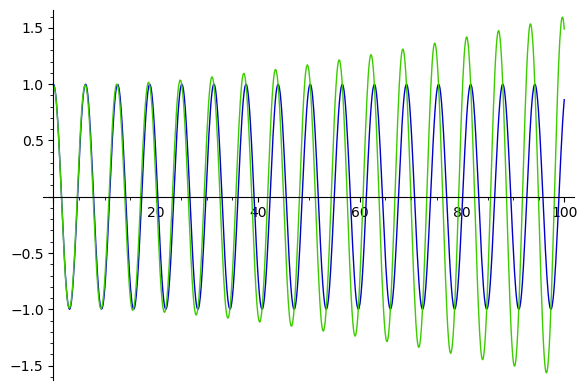

In [22]:
plot([x0.subs(values), (sol_1).subs(values)], (t, 0, 100))

In [30]:
disp(eq1)

<IPython.core.display.Math object>

In [23]:
eq1_x = eq1.substitute_function(x1 == x)

eq1_x_lhs = 0
subs_from = cos(omega_0*t + phi)
subs_to = x/A

for m in eq1_x.lhs().operands():
    if m.has(subs_from):
        m = m / subs_from * subs_to
        
    eq1_x_lhs += m

eq1_x = eq1_x_lhs == 0
disp(eq1_x)

<IPython.core.display.Math object>

In [24]:
sol1_x = desolve(eq1_x, x, ivar=t)
disp(sol1_x)

<IPython.core.display.Math object>

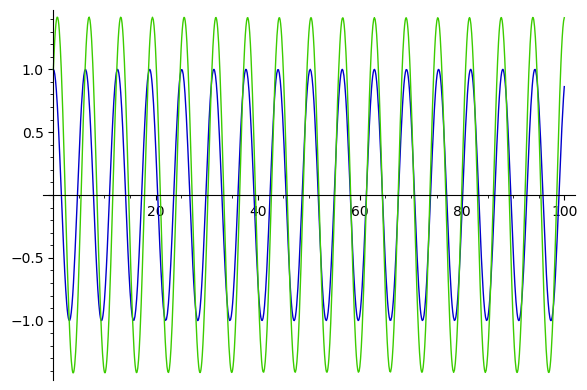

In [25]:
plot([x0.subs(values), (sol1_x).subs([values, var("_K1") == 1, var("_K2") == 1])], (t, 0, 100))

In [26]:
# метод последовательных приближений
# в нелинейной части пренебегаем добавкой x1 ввиду его малости по сравнению с x0
eq2 = eq0.substitute_function(x == x0 + sol1_x + x2).lhs() \
     + nonlinear.substitute_function(x == x0 + sol1_x) \
     == 0
#disp(eq2)

In [27]:
eq2 = eq2.expand()
#disp(eq2)

In [28]:
eq2 = eq2.trig_reduce()
#disp(eq2)
eq2

-1/2048*A^9*alpha^4*omega_0^5*t^3*sin(3*omega_0*t + 3*phi) - 1/2048*A^9*alpha^4*omega_0^5*t^3*sin(omega_0*t + phi) - 7/8192*A^9*alpha^4*omega_0^4*t^2*cos(5*omega_0*t + 5*phi) - 5/8192*A^9*alpha^4*omega_0^4*t^2*cos(omega_0*t + phi) + 15/32768*A^9*alpha^4*omega_0^3*t*sin(7*omega_0*t + 7*phi) - 7/32768*A^9*alpha^4*omega_0^3*t*sin(5*omega_0*t + 5*phi) + 11/8192*A^9*alpha^4*omega_0^3*t*sin(3*omega_0*t + 3*phi) - 17/16384*A^9*alpha^4*omega_0^3*t*sin(omega_0*t + phi) + 3/128*A^7*alpha^3*omega_0^4*t^2*cos(3*omega_0*t + 3*phi) + 1/128*A^7*alpha^3*omega_0^4*t^2*cos(omega_0*t + phi) + 9/131072*A^9*alpha^4*omega_0^2*cos(9*omega_0*t + 9*phi) + 3/65536*A^9*alpha^4*omega_0^2*cos(7*omega_0*t + 7*phi) + 5/65536*A^9*alpha^4*omega_0^2*cos(5*omega_0*t + 5*phi) - 9/131072*A^9*alpha^4*omega_0^2*cos(3*omega_0*t + 3*phi) - 1/8192*A^9*alpha^4*omega_0^2*cos(omega_0*t + phi) - 7/256*A^7*alpha^3*omega_0^3*t*sin(5*omega_0*t + 5*phi) + 1/128*A^7*alpha^3*omega_0^3*t*sin(3*omega_0*t + 3*phi) - 11/256*A^7*alpha^3*omeg

In [29]:
sol2 = desolve(eq2, x2, ivar=t)
#disp(sol2)
sol2

5/524288*A^9*alpha^4*omega_0*t*sin(7*omega_0*t + 7*phi) + 9/10485760*A^9*alpha^4*cos(9*omega_0*t + 9*phi) + 7/2359296*(7*A^9*alpha^4 - 384*A^7*alpha^3)*omega_0*t*sin(5*omega_0*t + 5*phi) + 1/12582912*(47*A^9*alpha^4 - 1920*A^7*alpha^3)*cos(7*omega_0*t + 7*phi) - 1/28311552*(1008*A^9*alpha^4*omega_0^2*t^2 - 251*A^9*alpha^4 + 12864*A^7*alpha^3 - 258048*A^5*alpha^2)*cos(5*omega_0*t + 5*phi) + 1/1048576*(213*A^9*alpha^4 - 2176*A^7*alpha^3 + 20480*A^5*alpha^2 - 48*(3*A^9*alpha^4 - 64*A^7*alpha^3)*omega_0^2*t^2 - 229376*A^3*alpha)*cos(3*omega_0*t + 3*phi) - 1/131072*(8*A^9*alpha^4*omega_0^4*t^4 + A^9*alpha^4 - 544*A^7*alpha^3 - 5120*A^5*alpha^2 - 2*(5*A^9*alpha^4 - 832*A^7*alpha^3 - 2048*A^5*alpha^2)*omega_0^2*t^2 + 57344*A^3*alpha)*cos(omega_0*t + phi) + _K2*cos(omega_0*t) - 1/131072*(8*A^9*alpha^4*omega_0^3*t^3 - (43*A^9*alpha^4 - 448*A^7*alpha^3 + 6144*A^5*alpha^2)*omega_0*t)*sin(3*omega_0*t + 3*phi) + 1/196608*(4*(11*A^9*alpha^4 - 64*A^7*alpha^3)*omega_0^3*t^3 - 3*(A^9*alpha^4 - 544*A^7*